# Stacking with area and bar plots


In [2]:
%matplotlib notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [36]:
df = pd.read_csv('sales.csv', parse_dates=['Date'])
df

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b
5,2017-04-18,5082,a
6,2017-05-02,2178,a
7,2017-05-04,2000,c
8,2017-05-24,2541,a
9,2017-06-06,3176,a


In [37]:
df['Month']=df['Date'].dt.month
df

,Date,Amount,Product,Month
0,2017-01-20,5411,b,1
1,2017-02-22,5000,c,2
2,2017-03-01,7260,a,3
3,2017-03-14,2117,c,3
4,2017-04-15,7516,b,4
5,2017-04-18,5082,a,4
6,2017-05-02,2178,a,5
7,2017-05-04,2000,c,5
8,2017-05-24,2541,a,5
9,2017-06-06,3176,a,6


In [38]:
g=df.groupby(['Month','Product'])['Amount'].sum()
g

Month  Product
1      a           7260
       b           9258
       c           1740
2      a           6534
       c           5000
3      a           7260
       c           2117
4      a          11616
       b          13221
       c           5440
5      a           7119
       c           2990
6      a          11071
       c           7176
7      a           4200
       b          15973
       c           2901
8      a          10342
       c           6662
9      c            660
10     a           2100
       b          10711
       c          14520
11     a           7260
       c           3710
12     a          11616
       b          14800
Name: Amount, dtype: int64

In [39]:
g=g.unstack()
g

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0
6,11071.0,NaN,7176.0
7,4200.0,15973.0,2901.0
8,10342.0,NaN,6662.0
9,NaN,NaN,660.0


In [40]:
revenue=g.fillna(0).cumsum()
revenue


Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,9258.0,6740.0
3,21054.0,9258.0,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,22479.0,17287.0
6,50860.0,22479.0,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,38452.0,34026.0
9,65402.0,38452.0,34686.0


<IPython.core.display.Javascript object>


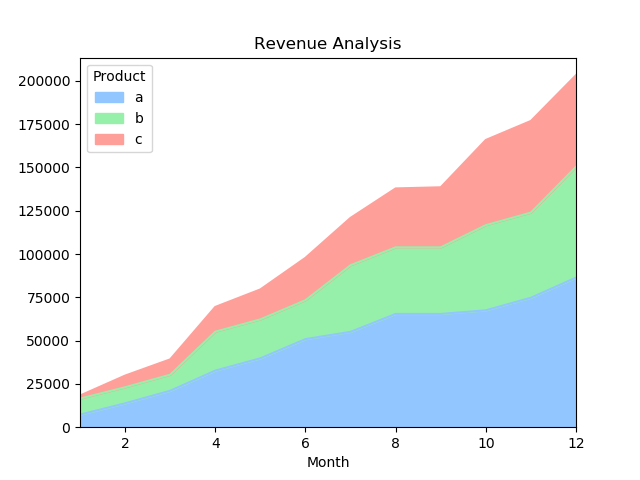

In [41]:
ax=revenue.plot.area(title="Revenue Analysis")

<IPython.core.display.Javascript object>


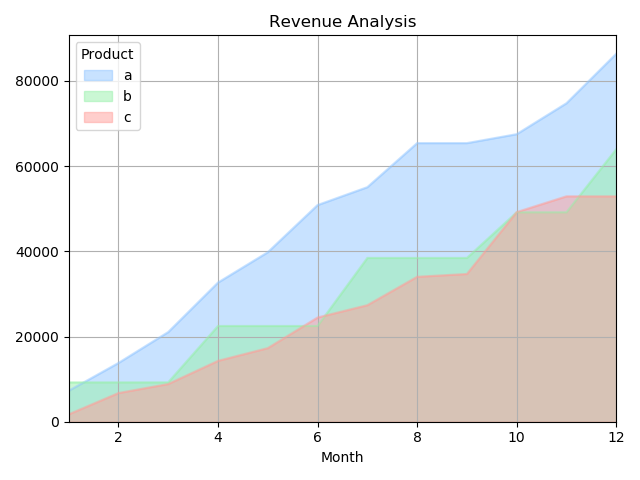

In [42]:
fig,ax=plt.subplots()
revenue.plot.area(title='Revenue Analysis', ax=ax, stacked=False, grid=True)
fig.tight_layout()

In [43]:
total_revenue=df.groupby('Month')['Amount'].sum().cumsum()
total_revenue

Month
1      18258
2      29792
3      39169
4      69446
5      79555
6      97802
7     120876
8     137880
9     138540
10    165871
11    176841
12    203257
Name: Amount, dtype: int64

<IPython.core.display.Javascript object>


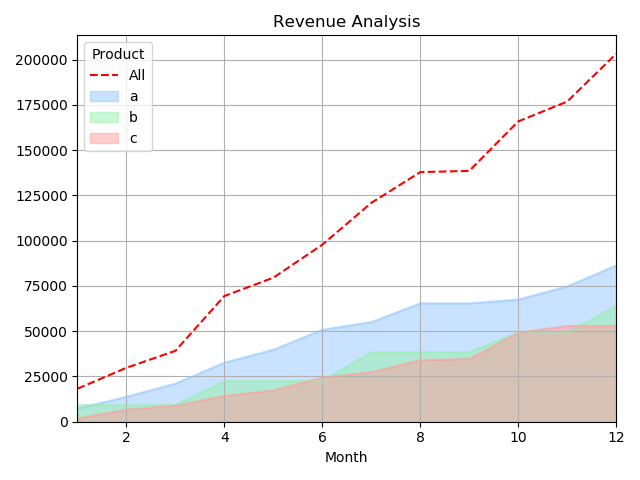

In [44]:
fig,ax = plt.subplots()
total_revenue.plot(ax=ax, style='r--', legend=True, label="All")
revenue.plot.area(title='Revenue Analysis', ax=ax, stacked=False, grid=True)
fig.tight_layout()

In [3]:
df=pd.read_csv('athletes.csv')
df.head()

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


In [4]:
top=df.groupby('nationality')[['gold','silver','bronze']].sum().sort_values('gold',ascending=False).head(10)
top.head()

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37


<IPython.core.display.Javascript object>


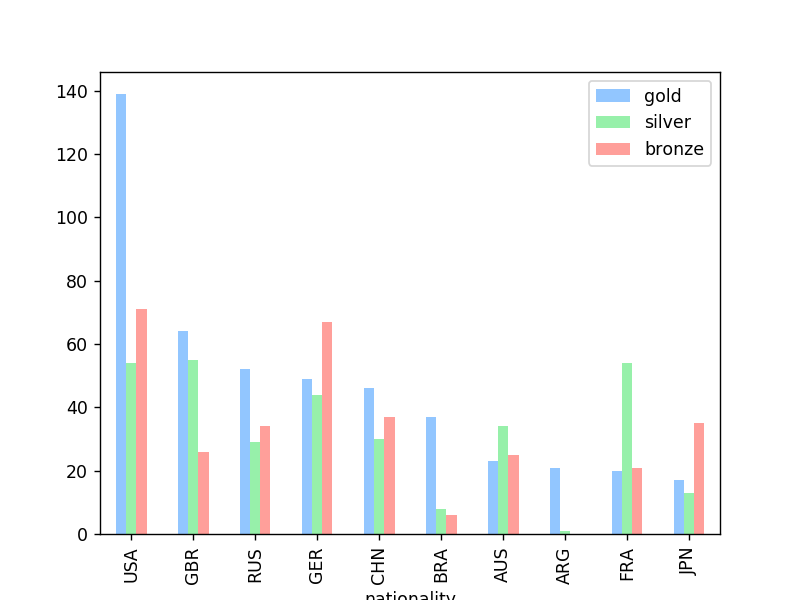

In [5]:
ax=top.plot.bar()

<IPython.core.display.Javascript object>


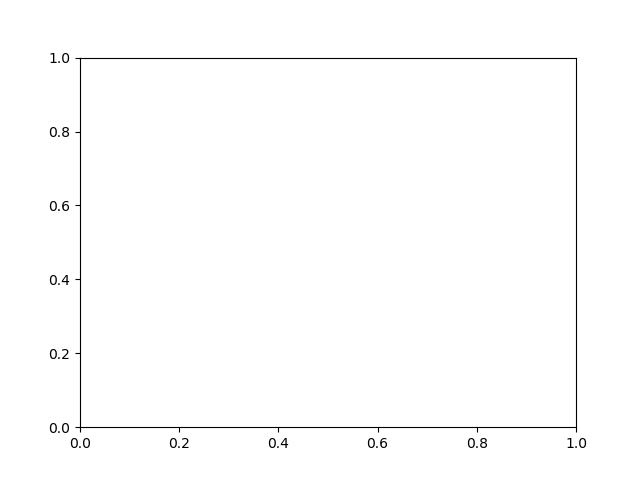

In [27]:
fig.ax=plt.subplots()
top.plot.bar(color=['gold','silver','brown'],ax=ax,stacked=True)
fig.tight_layout()

# styling:colors,themes,size

In [113]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [114]:
plt.style.use('ggplot')

In [18]:
df=pd.read_csv('sales.csv',parse_dates=['Date'])
df['Month']=df['Date'].dt.month
sales=df.groupby(['Month','Product'])['Amount'].sum().unstack()
sales

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0
6,11071.0,NaN,7176.0
7,4200.0,15973.0,2901.0
8,10342.0,NaN,6662.0
9,NaN,NaN,660.0


<IPython.core.display.Javascript object>


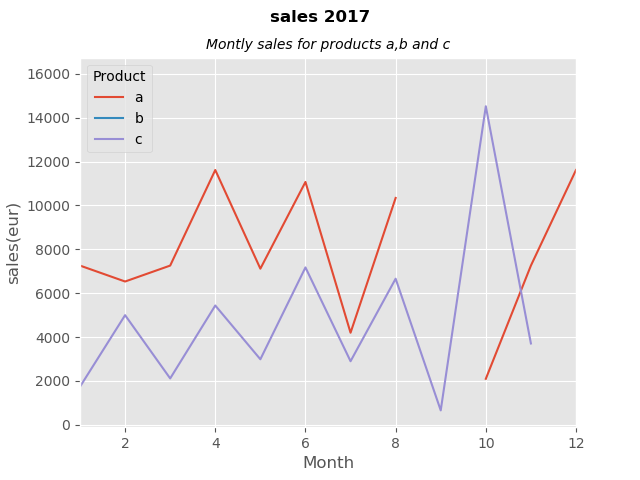

In [19]:
fig, ax=plt.subplots()
sales.plot(ax=ax)

<IPython.core.display.Javascript object>


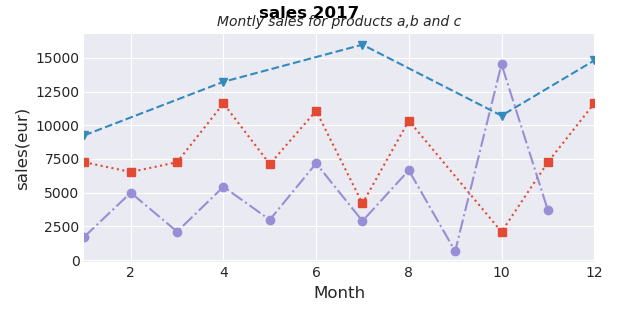

In [64]:
styles={'a':':s','b':'--v','c':'-.o'}
with plt.style.context('seaborn-dark'):
    fig, ax=plt.subplots(figsize=(6,3))
    for column in styles:
        sales[column].dropna().plot(ax=ax,style=styles)

In [65]:
fig.suptitle("sales 2017",fontweight='bold')
ax.set_title("Montly sales for products a,b and c",fontstyle='italic',fontsize='10')
ax.set_ylabel('sales(eur)')
ax.grid(True)
fig.tight_layout()

# scatter plots

In [6]:
df=pd.read_csv('athletes.csv',parse_dates=['date_of_birth'])
df.head()

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


<IPython.core.display.Javascript object>


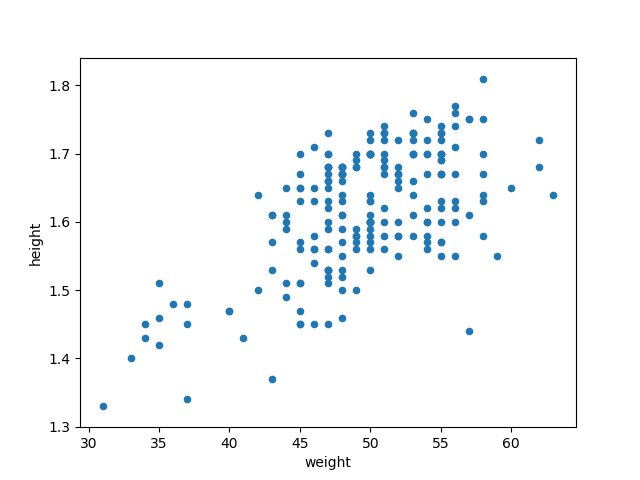

In [11]:
f=df[df['sex']=='female']
m=df[df['sex']=='male']
tennis_f=f[f['sport']=='tennis']
tennis_m=m[m['sport']=='tennis']
gymnast_f=f[f['sport']=='gymnastics']
gymnast_m=m[m['sport']=='gymnastics']
gymnast_f.plot.scatter(x='weight',y='height')

<IPython.core.display.Javascript object>


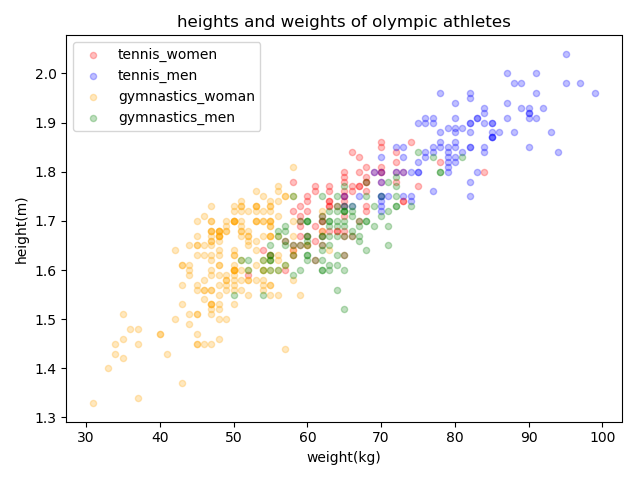

In [12]:
fig, ax=plt.subplots()
plots=[(tennis_f,'red','tennis_women'),
       (tennis_m,'blue','tennis_men'),
       (gymnast_f,'orange','gymnastics_woman'),
       (gymnast_m,'green','gymnastics_men')]
for df,color,label in plots:
    df.plot.scatter(ax=ax,x='weight',y='height',alpha=.25,color=color,label=label)
ax.set_xlabel('weight(kg)')
ax.set_ylabel('height(m)')
ax.set_title('heights and weights of olympic athletes');

<IPython.core.display.Javascript object>


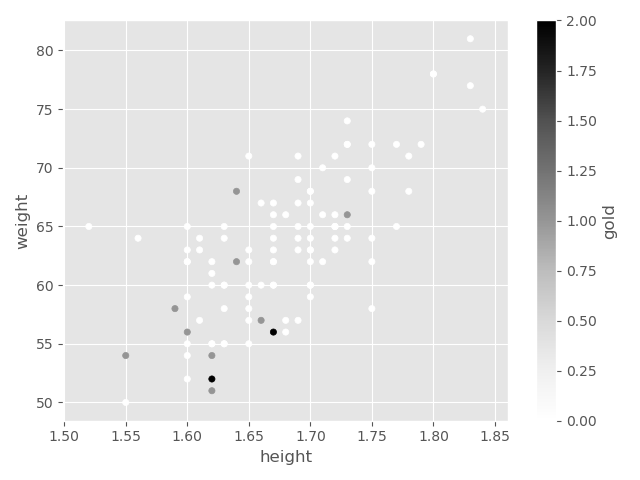

In [70]:
fig, ax=plt.subplots()
gymnast_m.plot.scatter(ax=ax,x='height',y='weight',c='gold')
fig.tight_layout()

<IPython.core.display.Javascript object>


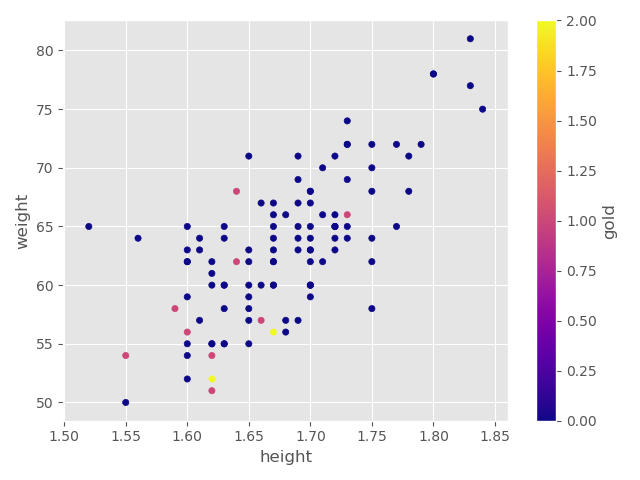

In [69]:
fig,ax=plt.subplots()
gymnast_m.plot.scatter(ax=ax,x='height',y='weight',c='gold',colormap='plasma')
fig.tight_layout()

# axes,tick

In [25]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# main properties of an axis
##limits:value where the axis starts and ends
#ticks:positions of indicator lines on the axis
#tick labels:text shown at ticks.

In [14]:
df=pd.read_csv('sales.csv',parse_dates=['Date'])
df['Month']=df['Date'].dt.month
sales=df.groupby(['Month','Product'])['Amount'].sum().unstack()
sales

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0
6,11071.0,NaN,7176.0
7,4200.0,15973.0,2901.0
8,10342.0,NaN,6662.0
9,NaN,NaN,660.0


<IPython.core.display.Javascript object>


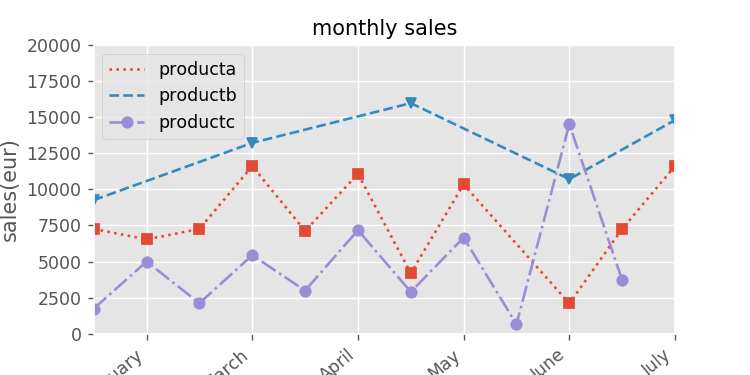

Text(0, 0.5, 'sales(eur)')

In [15]:
styles={'a':':s','b':'--v','c':'-.o'}
with plt.style.context('ggplot'):
    fig,ax=plt.subplots(figsize=(6,3))
    for column in styles:
        sales[column].dropna().plot(ax=ax,style=styles[column],grid=True,ylim=(0,20000),legend=True,label='product'+column)
ax.set_title("monthly sales")
ax.set_ylabel("sales(eur)")

In [71]:
ax.set_xticks(range(1,13))

In [16]:
import calendar
ax.set_xticklabels([calendar.month_name[x]for x in sales.index],rotation=40,ha='right')

[Text(0.0, 0, 'January'),
 Text(2.0, 0, 'February'),
 Text(4.0, 0, 'March'),
 Text(6.0, 0, 'April'),
 Text(8.0, 0, 'May'),
 Text(10.0, 0, 'June'),
 Text(12.0, 0, 'July')]

# interactive plots

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
def f(x=1,y=2):
    return y*x
interact(f,x=(-5,5),y=(0,10));

interactive(children=(IntSlider(value=1, description='x', max=5, min=-5), IntSlider(value=2, description='y', …

In [4]:
interact(f,x=['John','mary','James'],y=(0,10));

interactive(children=(Dropdown(description='x', options=('John', 'mary', 'James'), value='John'), IntSlider(va…

In [5]:
df=pd.read_csv('athletes.csv')
df.head()

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


In [6]:
def make_plot(sport1, gender1, sport2, gender2):
    fig, ax = plt.subplots()
    a = df[(df['sex']==gender1)&(df['sport']==sport1)]
    b = df[(df['sex']==gender2)&(df['sport']==sport2)]
    a.plot.scatter(ax=ax, x='weight',y='height',alpha=.25,color='b',label=sport1+","+gender1)
    b.plot.scatter(ax=ax, x='weight',y='height',alpha=.25,color='r',label=sport2+","+gender2)
all_sport= df['sport'].drop_duplicates().sort_values()
interact(make_plot,sport1=all_sport,gender1=['male','female'],sport2=all_sport,gender2=['male','female']);

interactive(children=(Dropdown(description='sport1', options=('aquatics', 'archery', 'athletics', 'badminton',…

In [8]:
medals = df.groupby(['sport','nationality'])[['gold','silver','bronze']].sum()
medals.sort_values(['gold'],ascending=False,inplace=True)
medals

,,gold,silver,bronze
sport,nationality,,,
aquatics,USA,61,18,10
athletics,USA,27,10,9
basketball,USA,24,0,0
football,GER,18,18,0
hockey,ARG,18,0,0
football,BRA,18,0,0
hockey,GBR,16,0,0
handball,RUS,15,0,0
rowing,GBR,15,11,0


In [12]:
def make_plot(n=10, sport='aquatics'):
    fig, ax=plt.subplots(figsize=(n,6))
    top=medals.loc[sport].head(n)
    top.plot.bar(color=['gold','silver','brown'],ax=ax,stacked=True,rot=45,title="top {} countries in {}".format(n,sport))
    ax.set_ylabel('medals')
interact(make_plot,n=widgets.IntSlider(min=5,max=100),continuous_update=False,sport=all_sport);

interactive(children=(IntSlider(value=5, description='n', min=5), Dropdown(description='sport', options=('aqua…